<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/Airbnb_Boston_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from xgboost import cv,DMatrix
%matplotlib inline


In [2]:
path='output.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.head(10)

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,1.0,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,1.0,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,2.0,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,1.0,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,1.0,4,1794,15400,30,18,91.0,0,1,0.21,0
5,94,0,5,2,1,0,0,4,2.0,2.0,2.0,4,1519,22500,3,13,100.0,0,3,0.18,1
6,89,1,558,2,1,0,0,2,1.0,1.0,1.0,4,1573,22900,2,9,89.0,0,3,0.15,0
7,89,1,558,2,1,0,0,2,1.0,1.0,1.0,4,131,20900,2,22,78.0,0,3,0.35,0
8,89,1,558,2,1,0,0,3,1.0,1.0,1.0,4,1135,25900,4,3,90.0,0,3,0.04,0
9,89,1,558,2,1,0,0,4,1.0,2.0,2.0,4,1299,34200,2,21,87.0,0,3,0.35,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [6]:
df.describe()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,1.607531,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,1.010933,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,16.000000,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


<Axes: xlabel='fraud', ylabel='count'>

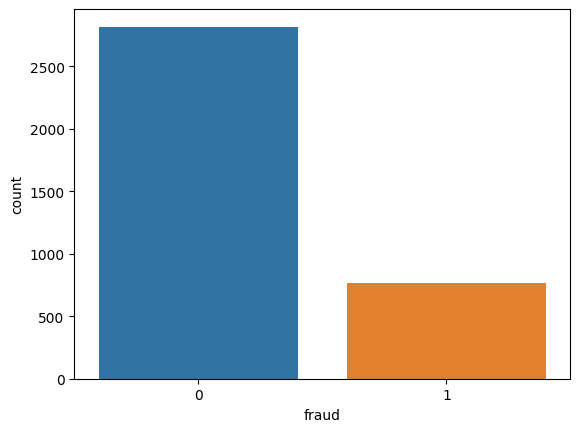

In [7]:
sns.countplot(x=df['fraud'])

In [8]:
df['fraud'].value_counts()

0    2818
1     767
Name: fraud, dtype: int64

<Axes: xlabel='bed_type', ylabel='count'>

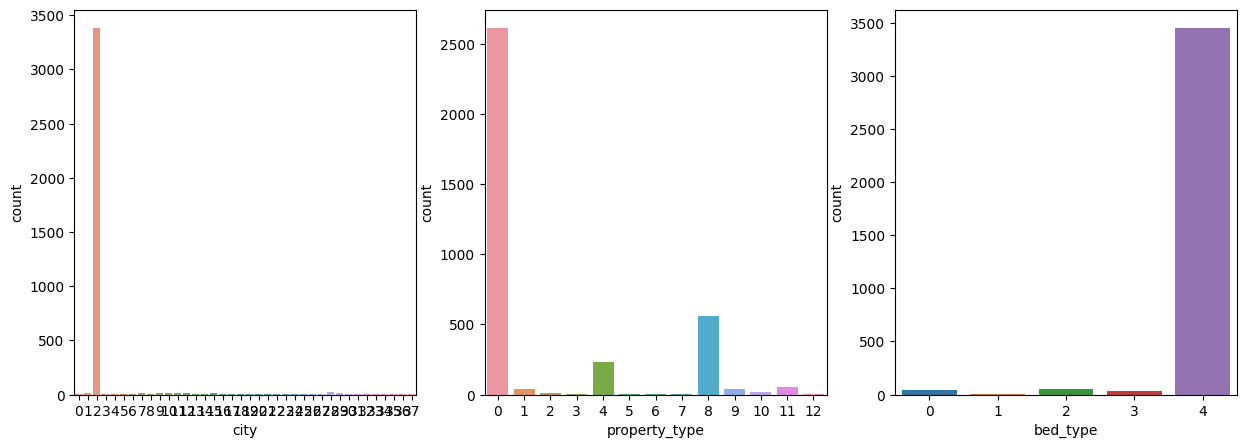

In [11]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df['city'],ax=ax[0])
sns.countplot(x=df['property_type'],ax=ax[1])
sns.countplot(x=df['bed_type'],ax=ax[2])

In [12]:
df=df.drop(['city','property_type','bed_type'],axis=1)

<Axes: xlabel='cancellation_policy', ylabel='count'>

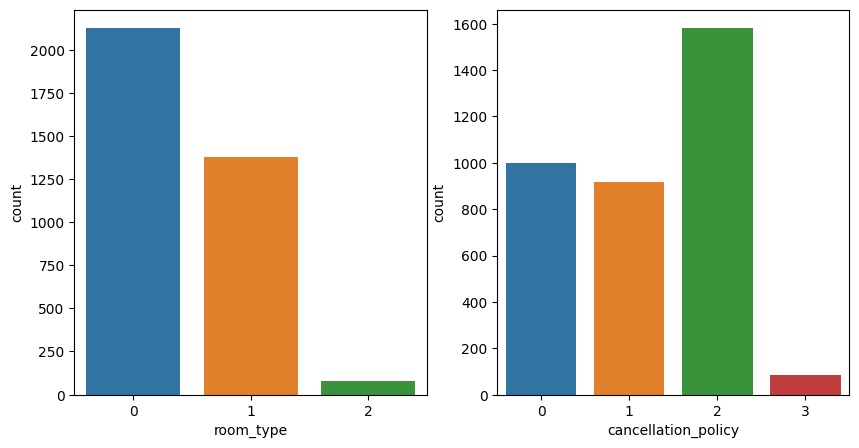

In [16]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['room_type'],ax=ax[0])
sns.countplot(x=df['cancellation_policy'])

<Axes: xlabel='instant_bookable', ylabel='count'>

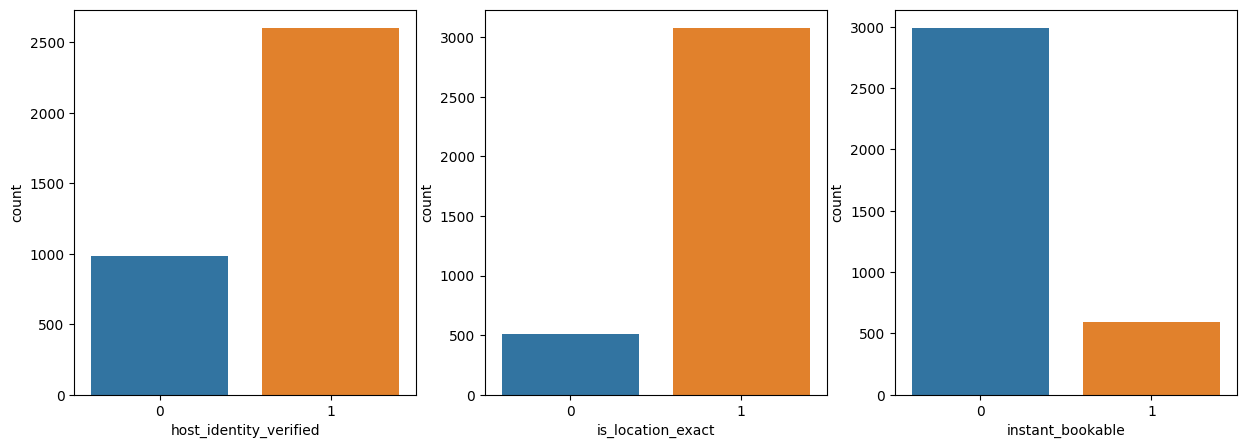

In [17]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x=df['host_identity_verified'],ax=ax[0])
sns.countplot(x=df['is_location_exact'],ax=ax[1])
sns.countplot(x=df['instant_bookable'],ax=ax[2])

In [18]:
df=pd.get_dummies(df,columns=['room_type','cancellation_policy'],drop_first=True)

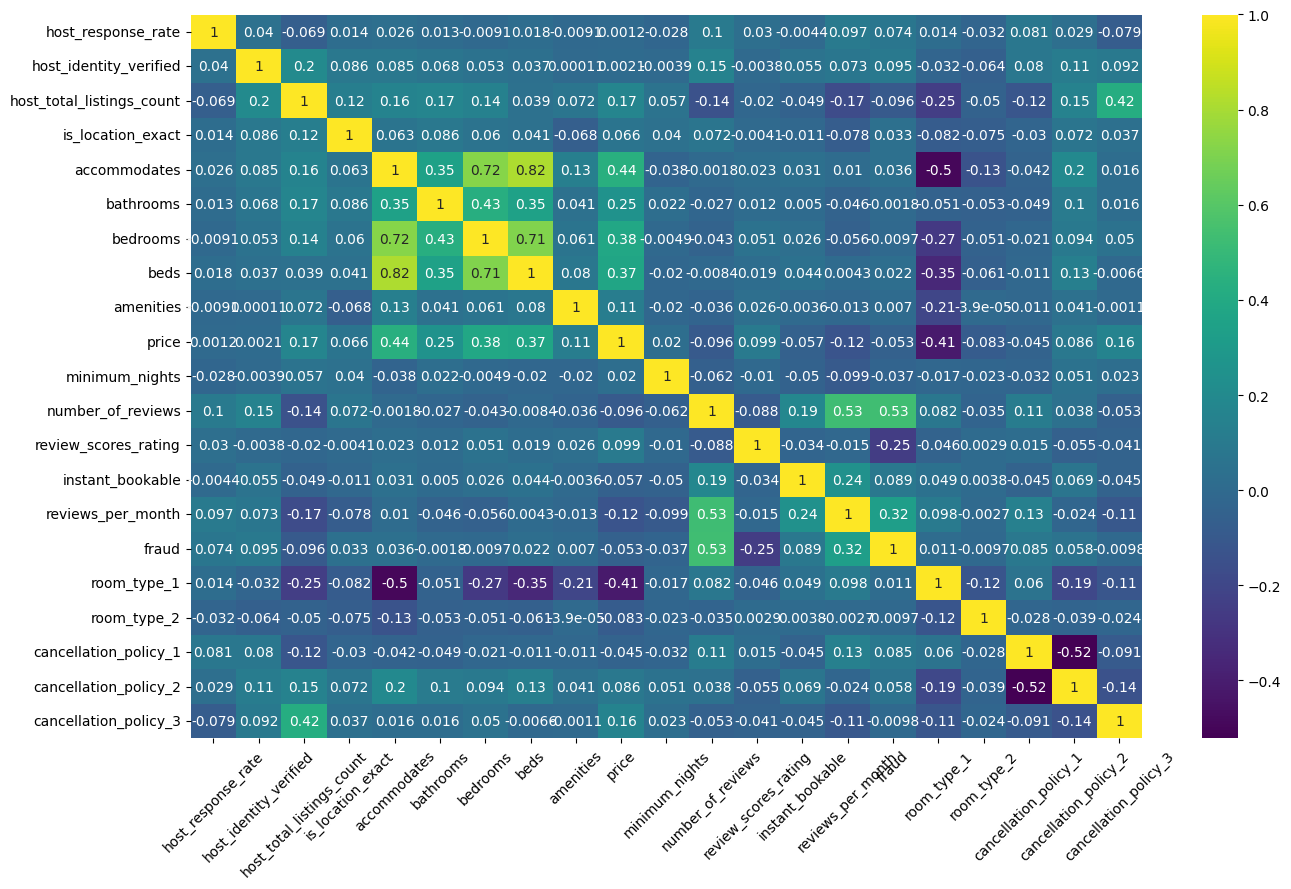

In [19]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
data=DMatrix(data=df.drop('fraud',axis=1),label=df['fraud'],feature_names=df.drop('fraud',axis=1).columns)

In [21]:
model=LogisticRegression()

In [22]:
cv_kf=KFold(n_splits=10,random_state=1,shuffle=True)

In [23]:
scaler=MinMaxScaler()

In [25]:
scores = cross_val_score(model, scaler.fit_transform(X=df.drop("fraud", axis=1)), df["fraud"], scoring='roc_auc', cv=cv_kf, n_jobs=4)

In [26]:
scores.mean()

0.8772921424350999

In [27]:
params={'objective':'binary:logistic','subsample':1,'colsample_bytree':0.3,'learning_rate':0.02,'max_depth':5,'alpha':10}

In [28]:
xbg_cv=cv(params=params,dtrain=data,num_boost_round=1000,nfold=10,early_stopping_rounds=10,metrics='auc')

In [31]:
xbg_cv.tail(1)

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
355,0.923567,0.001659,0.89965,0.017336
